# Integrated Project

# Itroduction

**The purpose of this project is to read in the datasets for an online store specialize in selling videos games all over the globe.**
**During the course of the project we will be performing some EDA follow by some partial observations,we will also do some patterns identification to determine whether a games succeds or not, and this will allow us to spot winners or loser and stage
feature advertisings campaigns.**
**We will also perform some test statistical hypotheses and output some implication of the test.**

<div class="alert alert-block alert-success">‚úîÔ∏è
    

__Reviewer's comment ‚Ññ1__

An excellent practice is to describe the goal and main steps in your own words (a skill that will help a lot on a final project). 

# Personal note:
**THANK YOU.**

In [1]:
from scipy import stats as st
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from math import factorial
from scipy.stats import pearsonr
import seaborn as sns

In [2]:
df = pd.read_csv('/datasets/games.csv') 


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.columns = df.columns.str.lower()
df.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

# 1.0 Duplicate assessment 

In [5]:
df = df.drop_duplicates()

In [6]:
df.duplicated().sum()

0

<div class="alert alert-block alert-success">‚úîÔ∏è

__Reviewer's comment ‚Ññ1__
    
Duplicate checking is the basis of data preprocessing

# 2.0 Data requires types and missing values assessment 

In [7]:
# We convert 'Name', 'Platform', 'Genre' to categorical (for memory optimization)
df['name'] = df['name'].astype('category')
df['platform'] = df['platform'].astype('category')
df['genre'] = df['genre'].astype('category')

In [8]:
df.dropna(subset=['name'], inplace=True)

<div class="alert alert-block alert-success">‚úîÔ∏è

__Reviewer's comment ‚Ññ1__
    
Lines with gaps in the Name are best deleted. We know almost nothing about these games.

In [9]:
# We use a group-by strategy to find the most frequent genre for each platform and fill missing values accordingly.
# The transform function ensures that the filled values are applied back to the original DataFrame for all rows.
df['genre'] = df.groupby('platform')['genre'].transform(lambda x: x.fillna(x.mode()[0]))

# 2.1 Name-Platform-Genre:
**There might have been minor issues during data entry or if the data was scraped from multiple sources, some games might not have full information, such as missing game titles.**
**Not all games might be categorized by genre, either due to inconsistent tagging by the data source or because the genre wasn't specified at the time of release.**
**Nane,Platform,Genre which are object types can stay as they are but we convert them to category type for memory optimization.**
**The Name column typically represents the title of a game, and missing names are problematic because it's a critical identifier. It‚Äôs important to avoid generic filler text in this case, as the name of the game is key to analysis.**
**Because the missing values are a small fraction of the total records (e.g., 2 out of 16,715), it might be safest to drop the rows with missing name.**
**Sometimes the genre might correlate with the platform or other factors. For example, if we know that games on certain platforms tend to belong to certain genres (e.g., action games are often on consoles), we can impute missing genres based on the platform.**




In [10]:
# We impute missing 'Year_of_Release' values with the median year
#median_year = df['year_of_release'].median()
#df['year_of_release'].fillna(median_year, inplace=True)

In [11]:
df = df.dropna(subset=['year_of_release'])

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
I opted for removing records with missings values because it < 2% compare to the total amount of data.

<div class="alert alert-block alert-success">‚úîÔ∏è
    

__Reviewer's comment ‚Ññ2__

Now correct

In [12]:
df['year_of_release'] = df['year_of_release'].astype(int)

In [13]:
#<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">

# 2.2 Year_of_Release:
**Since Year_of_Release contains float64 type, but the values represent years (which should be integers), we can convert this column to int.**
**If the game was released across multiple years (for example, in different regions or platforms), there might be uncertainty or missing information about the exact release year.**
**Since 266 missing values is not a huge portion of the data, and since 266 of 16,715 entries (~1.6%) are missing in the Year_of_Release column. This is a relatively small fraction, and dropping these rows is unlikely to significantly impact our analysis.**

In [14]:
# We convert 'TBD' to NaN
df['user_score'] = df['user_score'].replace('TBD', np.nan)
#  the column is of numeric type
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

<div class="alert alert-block alert-success">‚úîÔ∏è
    

__Reviewer's comment ‚Ññ1__

That's right, tbd is the same in meaning as skip

In [15]:
# We impute with the median User_Score (robust to outliers)
median_user_score = df['user_score'].median()
df['user_score'].fillna(median_user_score, inplace=True)

# 2.3 User_Score:
**Since TBD represent unavailable data, the best approach is to convert the TBD values to NaN (Not a Number), which is the standard representation for missing data.This will allow us to treat the missing values as missing, which can be handled appropriately during analysis.**
**Some games might not have had enough user participation, leading to a lack of available scores. Alternatively, missing scores could be due to users not providing ratings.**
**If some games were rated with non-numeric scores (e.g., tbd for "to be determined"), this could result in missing values or misformatted data.**
**Since 6,701 missing values represent a large proportion of the data (40%),imputing these values with a central tendency measure like the median or mean could be an effective and simple solution. The median is often preferred because it is less sensitive to outliers than the mean.**

In [16]:
# We convert 'Rating' to categorical (for efficiency)
df['rating'] = df['rating'].astype('category')

In [17]:
#We group by 'Platform' and 'Genre', and impute missing 'Rating' values with the most frequent value (mode) within each group
def impute_mode(group):
    mode_value = group.mode()
    if not mode_value.empty:
        return group.fillna(mode_value[0])
    else:
        # If no mode found (all values are NaN in this group), fill with a default value, such as 'Unknown'
        return group.fillna('Unknown')

# Add 'Unknown' to the categories of 'rating'
df['rating'] = df['rating'].cat.add_categories('Unknown')
# Apply the function to each group
df['rating'] = df.groupby(['platform', 'genre'])['rating'].transform(impute_mode)
# Verify if there are any remaining missing values
print(df['rating'].isnull().sum())

0


<div class="alert alert-block alert-success">‚úîÔ∏è
    

__Reviewer's comment ‚Ññ1__

Great code

# 2.4 Rating:
**As stated in the above comment section we convert Rating to categorical for memory optimization.**
**One of the reason for missing values is that games have an age rating (e.g., ESRB ratings like "E", "T", "M"), but not all games are rated, especially if they are indie, niche, or haven't been officially rated by a recognized body.**
**Also some games may be rated in some countries but not others, especially if the game was released in multiple regions.If the dataset combines global data, it may only contain ratings for certain regions.**
**Here we used group-based-imputation technique by imputing (filling in) the missing data based on patterns**

In [18]:
# # Impute missing 'Critic_Score' values with the mean
df['critic_score'].fillna(df['critic_score'].mean(), inplace=True)


# 2.5 Critic_Score:
**We believe one of the possible cause of missing values is that not all games are reviewed by critics, and some games may not have received a critic score due to lack of reviews, or the reviews may not have been aggregated by the dataset's source.**
**Also smaller or indie games that didn't receive widespread media attention may lack critic scores, especially if they were released without formal reviews.**
**We believe that Critic_Score is related to other features (Platform, Genre, or Year_of_Release),because of that assumptions we can impute missing Critic_Score values based on the mean Critic_Score.**

In [19]:
df.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score   rating  
0     28.96      3.77         8.45     76.000000         8.0        E  
1      3.58      6.81         0.77     68.994363         7.5  Unknown  
2     12.76      3.79         3.29     82.000000         8.3        E  
3     10.93      3.28         2.95     80.000000         8.0        E  
4      8.89     10.22         1.00     68.994363         7.5  Unknown

In [20]:
# Calculate the total sales for each game by summing the sales across all regions
df['total1_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

<div class="alert alert-block alert-success">‚úîÔ∏è

__Reviewer's comment ‚Ññ1__
    
You can also use sum with axis=1 argument

In [21]:
df.head()


name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score   rating  \
0     28.96      3.77         8.45     76.000000         8.0        E   
1      3.58      6.81         0.77     68.994363         7.5  Unknown   
2     12.76      3.79         3.29     82.000000         8.3        E   
3     10.93      3.28         2.95     80.000000         8.0        E   
4      8.89     10.22         1.00     68.994363         7.5  Unknown   

   total1_sales  
0         82.54  
1         40.24  
2         35.52  
3         32.77  
4         31.38

In [22]:
# let Look at how many games were released in different years
games_per_year = df.groupby('year_of_release').size()
#games_per_year

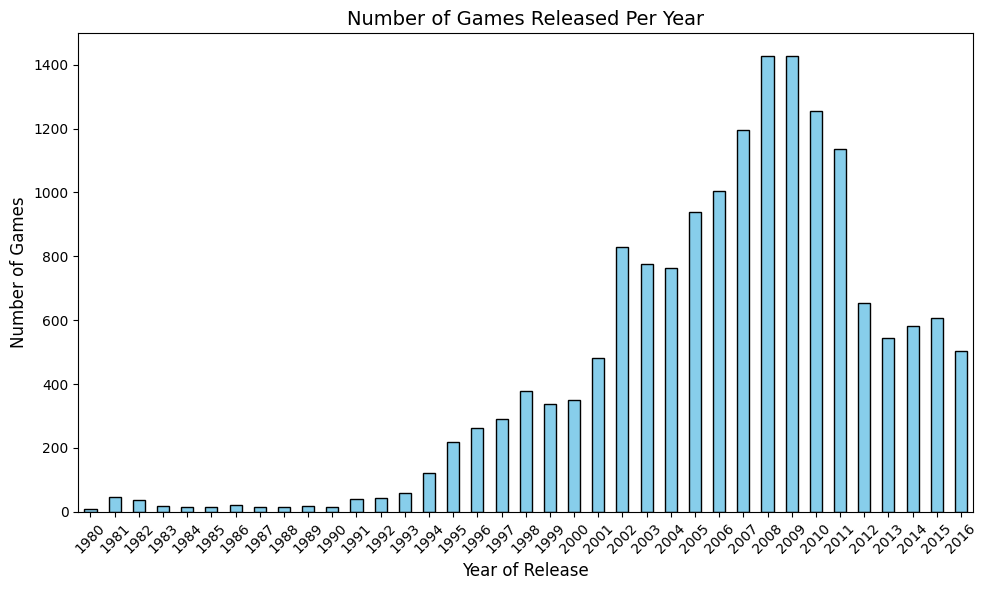

In [23]:
df_cleaned = df.dropna(subset=['year_of_release'])
# the number of games released per year
games_per_year = df_cleaned.groupby('year_of_release').size()

# the bar plot
plt.figure(figsize=(10, 6))
games_per_year.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Games Released Per Year', fontsize=14)
plt.xlabel('Year of Release', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-warning">üìù

__Reviewer's comment ‚Ññ1__
    

It would be nice to add visualizations. In order to build a graph, you need to group the data (in our case, the year of release and quantity)
    
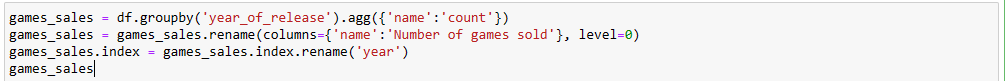
    
---
Next, using the sns library (it's powerful, and you can do anything with it). From the data in the grouped table, plot the graph. You can have it if you want =) The main thing is to play around with the arguments and figure it out. In future projects you will build powerful graphs, this skill will come in handy there    
    
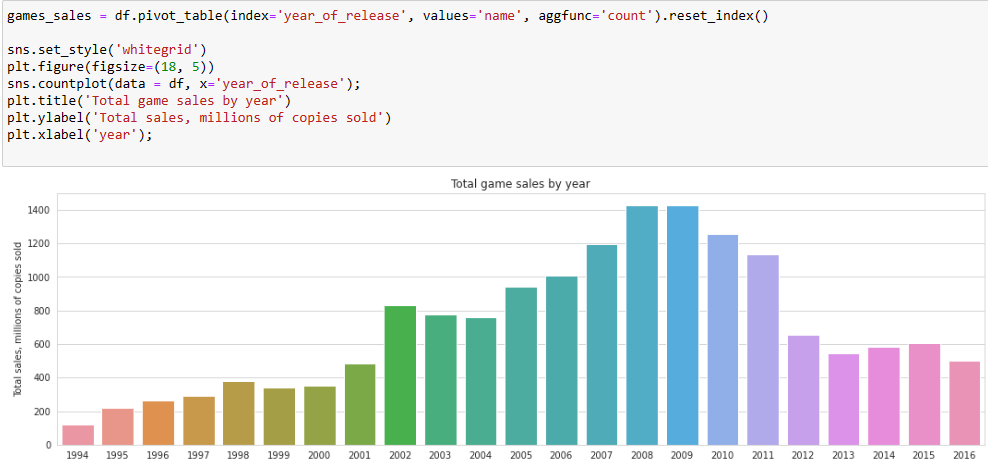
</div>

# Is the data for every period significant?
**The data for every period are not the same.From the above output we see that from 1980 to 1993 the release is well under 100
for each year, for the period 1994 till 2005-2012 till 2016the release is well under 1000 for each year and finally for period 2006 till 2011 we see that the release is well above 1000 for each year.**

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16444 non-null  category
 1   platform         16444 non-null  category
 2   year_of_release  16444 non-null  int64   
 3   genre            16444 non-null  category
 4   na_sales         16444 non-null  float64 
 5   eu_sales         16444 non-null  float64 
 6   jp_sales         16444 non-null  float64 
 7   other_sales      16444 non-null  float64 
 8   critic_score     16444 non-null  float64 
 9   user_score       16444 non-null  float64 
 10  rating           16444 non-null  category
 11  total1_sales     16444 non-null  float64 
dtypes: category(4), float64(7), int64(1)
memory usage: 1.5 MB


# Here we look at how sales varied from platform to platform.

In [25]:
def sales_variation_by_platform(df):
    platform_sales = df.groupby('platform')['total1_sales'].sum().sort_values(ascending=False)
    print(platform_sales)

#sales_variation_by_platform(df)

# We choose the tops 5 platforms with the greatest total sales and build a distribution based on data for each year

# The tops 5 platforms with the greatest total sales

In [26]:
# Create a dictionary with the earliest release year for each platform
platform_release_years = (
    df.groupby('platform')['year_of_release']
    .min()
    .to_dict()
)


print("Platform Release Years:")
print(platform_release_years)

Platform Release Years:
{'2600': 1980, '3DO': 1994, '3DS': 2011, 'DC': 1998, 'DS': 1985, 'GB': 1988, 'GBA': 2000, 'GC': 2001, 'GEN': 1990, 'GG': 1992, 'N64': 1996, 'NES': 1983, 'NG': 1993, 'PC': 1985, 'PCFX': 1996, 'PS': 1994, 'PS2': 2000, 'PS3': 2006, 'PS4': 2013, 'PSP': 2004, 'PSV': 2011, 'SAT': 1994, 'SCD': 1993, 'SNES': 1990, 'TG16': 1995, 'WS': 1999, 'Wii': 2006, 'WiiU': 2012, 'X360': 2005, 'XB': 2000, 'XOne': 2013}


In [27]:
def top_5_platforms(df):
    top_platforms = df.groupby('platform')['total1_sales'].sum().nlargest(5)
    print(top_platforms)
    return top_platforms.index.tolist()
#with anomalies
top_platforms_list = top_5_platforms(df)
print("\nTop 5 Platforms:", top_platforms_list)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
Name: total1_sales, dtype: float64

Top 5 Platforms: ['PS2', 'X360', 'PS3', 'Wii', 'DS']


# We build a distribution plot based on data for each year for tops 5 platforms

platform
PS2     482.36
DS      352.15
PS3     335.29
X360    314.33
Wii     294.02
Name: total1_sales, dtype: float64


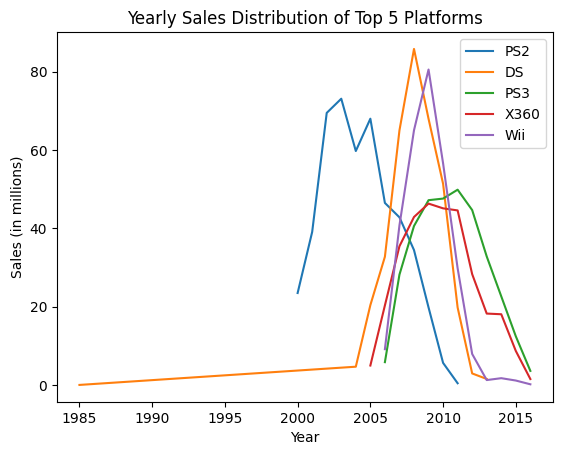

In [28]:
# Function to filter out anomalies based on platform release years
def filter_platform_anomalies(df, platform_release_years):
    for platform, release_year in platform_release_years.items():
        df = df[~((df['platform'] == platform) & (df['year_of_release'] < release_year))]
    return df

# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Function to plot the distribution of top 5 platforms
def top_5_platforms_distribution(df, top_platforms):
    for platform in top_platforms:
        platform_data = df[df['platform'] == platform]
        platform_data = platform_data.groupby('year_of_release')['total1_sales'].sum()
        platform_data.plot(label=platform)
    plt.legend()
    plt.title("Yearly Sales Distribution of Top 5 Platforms")
    plt.xlabel("Year")
    plt.ylabel("Sales (in millions)")
    plt.show()

# Remove outliers
df_cleaned = remove_outliers(df, 'total1_sales')

# Remove platform anomalies
df_cleaned = filter_platform_anomalies(df_cleaned, platform_release_years)

# Generate the list of top platforms
top_platforms = top_5_platforms(df_cleaned)
top_5_platforms_distribution(df_cleaned, top_platforms)

# Observation

**This shows that PS2 is the dominant platform, with other platforms falling behind in terms of sales.**

In [29]:
# Filter the dataset for the "DS" platform
ds_data = df[df['platform'] == 'DS']

# Find the earliest release year for "DS"
actual_release_year_ds = ds_data['year_of_release'].min()

print(f"The actual release year of DS based on the dataset is: {actual_release_year_ds}")

The actual release year of DS based on the dataset is: 1985


<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
Anomaly filter was added    

<div class="alert alert-block alert-success">‚úîÔ∏è
    

__Reviewer's comment ‚Ññ2__

Correct

# Platforms with high sales that now have zero sales

In [30]:
def platforms_with_declining_sales():
        high_sales_platforms = df.groupby('platform')['total1_sales'].sum()
        zero_sales_platforms = df[df['year_of_release'] == df['year_of_release'].max()]['platform'].value_counts()
        declining_platforms = high_sales_platforms[~high_sales_platforms.index.isin(zero_sales_platforms.index)]
        print(declining_platforms)
        
print("\n4. Platforms with declining sales:")
platforms_with_declining_sales()        


4. Platforms with declining sales:
Series([], Name: total1_sales, dtype: float64)


# How long does it generally take for new platforms to appear and old ones to fade?

In [31]:
def platform_lifetime_analysis():
        platform_years = df.groupby('platform')['year_of_release'].agg(['min', 'max'])
        platform_years['lifetime'] = platform_years['max'] - platform_years['min']
        print(platform_years)
        
print("\n5. Platform lifetime analysis:")
platform_lifetime_analysis()  


5. Platform lifetime analysis:
           min   max  lifetime
platform                      
2600      1980  1989         9
3DO       1994  1995         1
3DS       2011  2016         5
DC        1998  2008        10
DS        1985  2013        28
GB        1988  2001        13
GBA       2000  2007         7
GC        2001  2007         6
GEN       1990  1994         4
GG        1992  1992         0
N64       1996  2002         6
NES       1983  1994        11
NG        1993  1996         3
PC        1985  2016        31
PCFX      1996  1996         0
PS        1994  2003         9
PS2       2000  2011        11
PS3       2006  2016        10
PS4       2013  2016         3
PSP       2004  2015        11
PSV       2011  2016         5
SAT       1994  1999         5
SCD       1993  1994         1
SNES      1990  1999         9
TG16      1995  1995         0
WS        1999  2001         2
Wii       2006  2016        10
WiiU      2012  2016         4
X360      2005  2016        11
XB     

# Determine what period you should take data for.

**2013‚Äì2016: I believe this range is effective as it captures recent trends while providing sufficient historical data for seasonal and growth patterns.**

# Which platforms are leading in sales? 

In [32]:
def leading_platforms_2013_2016():
        filtered_df = df[(df['year_of_release'] >= 2013) & (df['year_of_release'] <= 2016)]
        leading_platforms = filtered_df.groupby('platform')['total1_sales'].sum().sort_values(ascending=False)
        print(leading_platforms)
        
leading_platforms_2013_2016()
print("\n6. Leading platforms (2013-2016):")

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
XB        0.00
TG16      0.00
SNES      0.00
SCD       0.00
SAT       0.00
WS        0.00
2600      0.00
PS2       0.00
3DO       0.00
PCFX      0.00
NG        0.00
NES       0.00
N64       0.00
GG        0.00
GEN       0.00
GC        0.00
GBA       0.00
GB        0.00
DC        0.00
PS        0.00
Name: total1_sales, dtype: float64

6. Leading platforms (2013-2016):


# Which ones are growing or shrinking?


In [33]:
def growth_shrink_analysis():
        yearly_sales = df[(df['year_of_release'] >= 2013) & (df['year_of_release'] <= 2016)].groupby(['year_of_release', 'platform'])['total1_sales'].sum()
        print(yearly_sales)
growth_shrink_analysis()
print("\n7. Growth/Shrink analysis:")

year_of_release  platform
2013             2600         0.00
                 3DO          0.00
                 3DS         56.57
                 DC           0.00
                 DS           1.54
                             ...  
2016             Wii          0.18
                 WiiU         4.60
                 X360         1.52
                 XB           0.00
                 XOne        26.15
Name: total1_sales, Length: 124, dtype: float64

7. Growth/Shrink analysis:


# Potentially profitable platforms

In [34]:
def potential_profitable_platforms(df):
    # Filter data for the years 2013 to 2016
    filtered_df = df[(df['year_of_release'] >= 2013) & (df['year_of_release'] <= 2016)]
    
    # Calculate total sales for each platform during this period
    platform_sales = filtered_df.groupby('platform')['total1_sales'].sum()
    
    # Calculate yearly sales to check consistency
    # We used unstack() to create a table of yearly sales by platform to assess trends.
    yearly_sales = filtered_df.groupby(['platform', 'year_of_release'])['total1_sales'].sum().unstack(fill_value=0)
    
    # Identify platforms with high total sales or consistent growth
    profitable_platforms = platform_sales[platform_sales > platform_sales.mean()].sort_values(ascending=False)
    
    print("Total sales (2013-2016) for profitable platforms:")
    print(profitable_platforms)
    print("\nYearly sales distribution for profitable platforms:")
    print(yearly_sales.loc[profitable_platforms.index])
    
    return profitable_platforms

profitable_platforms = potential_profitable_platforms(df)

Total sales (2013-2016) for profitable platforms:
platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
Name: total1_sales, dtype: float64

Yearly sales distribution for profitable platforms:
year_of_release    2013    2014    2015   2016
platform                                      
PS4               25.99  100.00  118.90  69.25
PS3              113.25   47.76   16.82   3.60
XOne              18.96   54.07   60.14  26.15
3DS               56.57   43.76   27.78  15.14
X360              88.58   34.74   11.96   1.52
WiiU              21.65   22.03   16.35   4.60
PC                12.38   13.28    8.52   5.25


# Observation

**PS4 is the dominant platform in terms of growth and profitability, with significant gains from 2013 to 2015 but a decline in 2016.**

**PS3 shows the expected lifecycle decline after the introduction of the PS4.**

**XOne experiences a similar trend to the PS4, with steady growth but a noticeable dip in 2016.**

**3DS shows steady sales initially but declines significantly after 2014.**

**X360 follows the expected decline post-launch of Xbox One, with a minimal drop after 2015.**

**WiiU struggles from the start with low sales, even with some gains in 2014, but the platform‚Äôs decline accelerates by 2016.**

**PC remains relevant but experiences a decline as consoles (especially PS4 and Xbox One) take a larger share of the gaming market.**

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
A period was reset from 2013-2016    

<div class="alert alert-block alert-success">‚úîÔ∏è
    

__Reviewer's comment ‚Ññ2__

Well done

# Box plot for global sales by platform (2013-2016)

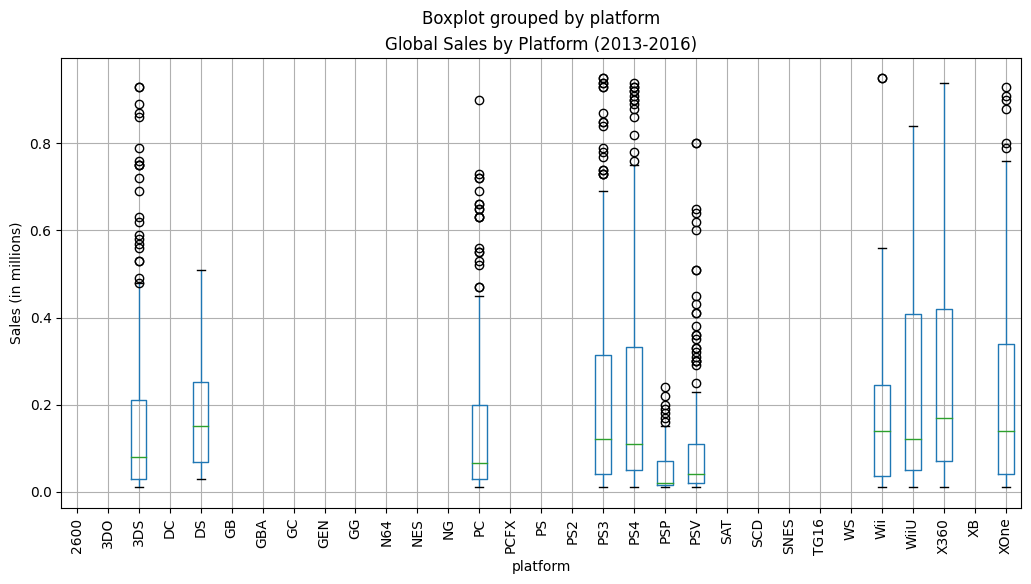

In [35]:
def boxplot_global_sales():
    # Filter data for the years 2013 to 2016
    filtered_df = df[(df['year_of_release'] >= 2013) & (df['year_of_release'] <= 2016)]
    
    # Calculate IQR to identify outliers
    Q1 = filtered_df['total1_sales'].quantile(0.25)
    Q3 = filtered_df['total1_sales'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out outliers
    filtered_df_no_outliers = filtered_df[(filtered_df['total1_sales'] >= lower_bound) & (filtered_df['total1_sales'] <= upper_bound)]
    
    # Create a boxplot without outliers
    filtered_df_no_outliers.boxplot(column='total1_sales', by='platform', figsize=(12, 6))
    
    plt.title("Global Sales by Platform (2013-2016)")
    plt.ylabel("Sales (in millions)")
    plt.xticks(rotation=90)
    plt.show()
boxplot_global_sales()

# Findings.

**One consistency we notice about the sales of games in multiples platforms is the absence of outliers below the minimun value.**
**We also observes a big inconsistency in the mediam value for each game in the platform**
**We also see some games that show no outliers,some with 2 to 3 outliers points and some with a huge amount of outliers point above the maximun value.**

<div class="alert alert-block alert-success">‚úîÔ∏è
    

__Reviewer's comment ‚Ññ1__

All right

# Average sales on various platforms for 2013-2016

In [36]:
def average_sales_analysis():
        filtered_df = df[(df['year_of_release'] >= 2013) & (df['year_of_release'] <= 2016)]
        avg_sales = filtered_df.groupby('platform')['total1_sales'].mean().sort_values(ascending=False)
        avg_sales = avg_sales.dropna() 
        print(avg_sales)
        
average_sales_analysis()
print("\n9. Average sales analysis:")

platform
PS4     0.801378
X360    0.735484
XOne    0.645020
Wii     0.593913
WiiU    0.562000
PS3     0.525884
3DS     0.472772
PC      0.208624
DS      0.192500
PSV     0.092151
PSP     0.052239
Name: total1_sales, dtype: float64

9. Average sales analysis:


#  How user and professional reviews affect sales for one popular platform (X360).

# Build a scatter plot and calculate the correlation between reviews and sales(X360).

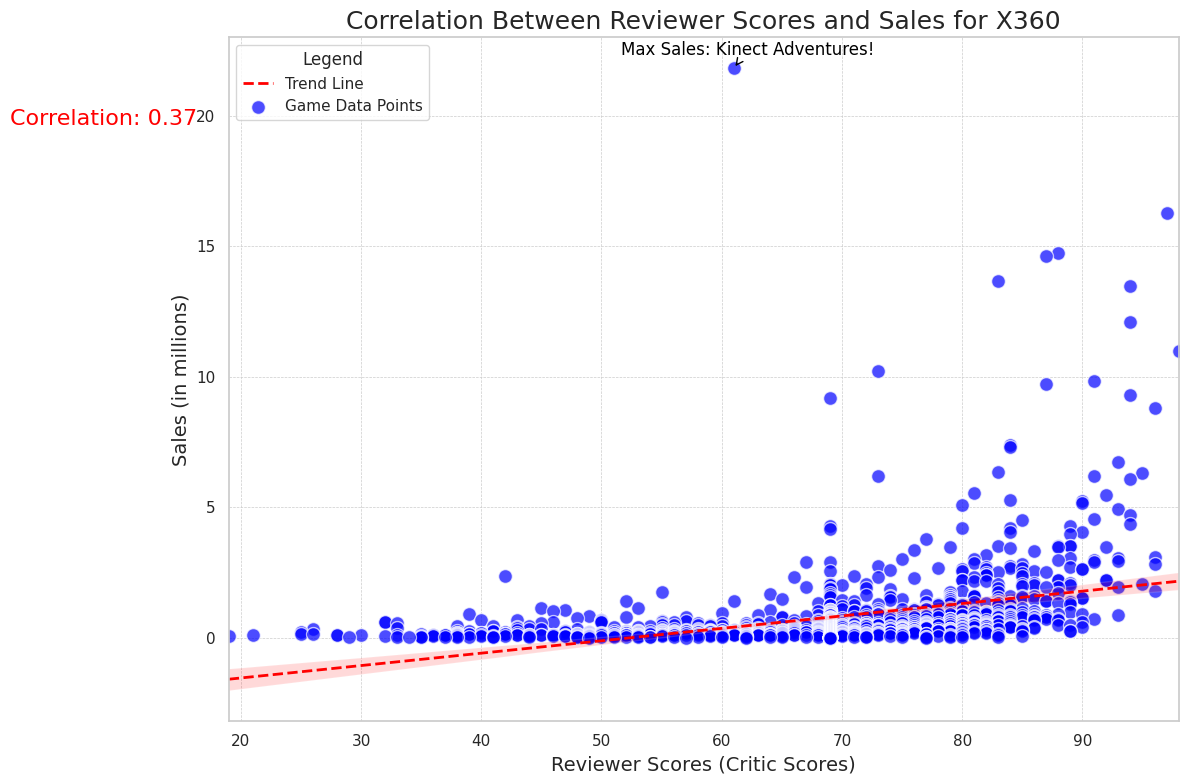

The correlation between reviewer scores and sales for X360 is: 0.37


In [37]:
# Set Seaborn style for better visuals
sns.set(style="whitegrid")

# Filter the data for X360 platform
x360_data = df[df['platform'] == 'X360']

# Extract sales and reviewer scores for X360
x360_sales = x360_data['total1_sales']
x360_critic_scores = x360_data['critic_score']

# Calculate the correlation between sales and reviewer scores
correlation = x360_sales.corr(x360_critic_scores)

# Set up the figure for the plot
plt.figure(figsize=(12, 8))

# Scatter plot: Sales vs Critic Scores for X360
plt.scatter(x360_critic_scores, x360_sales, color='blue', alpha=0.7, s=100, edgecolors='w', linewidth=1, label="Game Data Points")

# Add a linear regression line
sns.regplot(x=x360_critic_scores, y=x360_sales, scatter=False, color='red', line_kws={'linewidth': 2, 'linestyle': '--'}, label='Trend Line')

# Add titles and labels
plt.title('Correlation Between Reviewer Scores and Sales for X360', fontsize=18)
plt.xlabel('Reviewer Scores (Critic Scores)', fontsize=14)
plt.ylabel('Sales (in millions)', fontsize=14)

# Display the correlation on the plot
plt.text(0.8, max(x360_sales) * 0.9, f'Correlation: {correlation:.2f}', fontsize=16, color='red')

# Add gridlines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add annotations for specific points (e.g., extreme outliers or notable games)
# For example, if we know the game with the highest sales or review score, we could annotate that point
max_sales_idx = x360_sales.idxmax()
plt.annotate(f"Max Sales: {x360_data.loc[max_sales_idx, 'name']}", 
             (x360_critic_scores[max_sales_idx], x360_sales[max_sales_idx]),
             textcoords="offset points", xytext=(10, 10), ha='center', fontsize=12, color='black', arrowprops=dict(arrowstyle="->", color='black'))

plt.legend(title="Legend", loc='upper left')

plt.tight_layout()
plt.show()

print(f"The correlation between reviewer scores and sales for X360 is: {correlation:.2f}")

#  We compare the sales of the same games(X360) on other platforms.



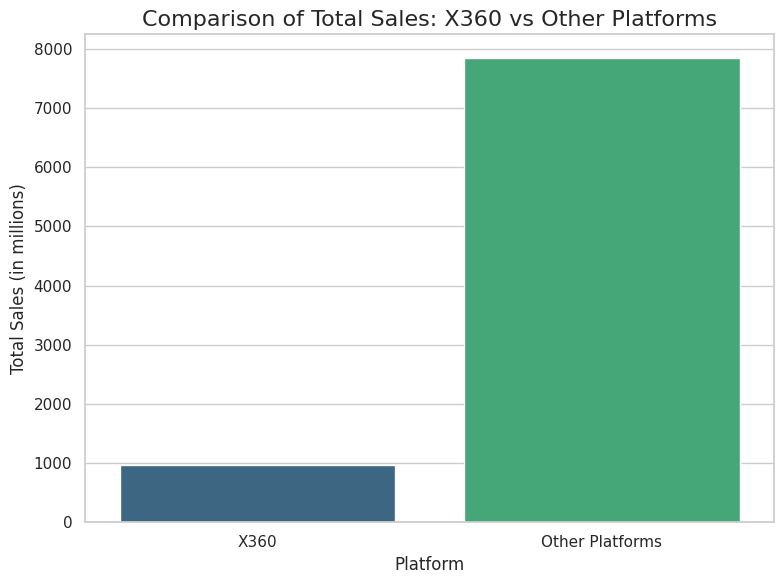

In [38]:
# Set Seaborn style for better visuals
sns.set(style="whitegrid")

# Aggregate sales for X360
x360_sales_total = df[df['platform'] == 'X360']['total1_sales'].sum()

# Aggregate sales for other platforms
other_platforms_sales_total = df[df['platform'] != 'X360']['total1_sales'].sum()

# Create a new dataframe for the sales comparison
sales_comparison = pd.DataFrame({
    'platform': ['X360', 'Other Platforms'],
    'total_sales': [x360_sales_total, other_platforms_sales_total]
})

# Plot the comparison using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='platform', y='total_sales', data=sales_comparison, palette='viridis')

plt.title('Comparison of Total Sales: X360 vs Other Platforms', fontsize=16)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Total Sales (in millions)', fontsize=12)

plt.tight_layout()
plt.show()

Correlation between Critic Score and Sales:
  Pearson Correlation: 0.37 (p-value: 0.0000)
Correlation between User Score and Sales:
  Pearson Correlation: 0.06 (p-value: 0.0383)


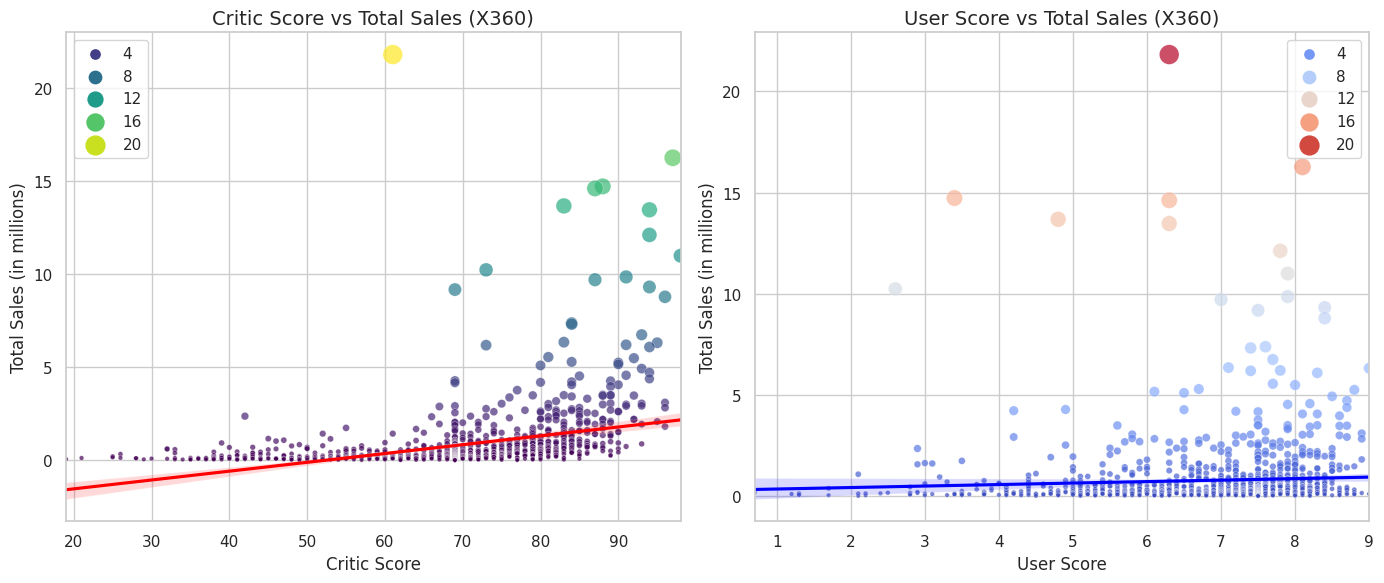

In [39]:
def reviews_vs_sales_analysis(df):
    # Filter data for X360 platform
    x360_df = df[df['platform'] == 'X360']
    
    # Drop rows with missing scores
    x360_df = x360_df.dropna(subset=['critic_score', 'user_score', 'total1_sales'])
    
    # Correlation analysis
    critic_corr, critic_pval = pearsonr(x360_df['critic_score'], x360_df['total1_sales'])
    user_corr, user_pval = pearsonr(x360_df['user_score'], x360_df['total1_sales'])
    
    print(f"Correlation between Critic Score and Sales:")
    print(f"  Pearson Correlation: {critic_corr:.2f} (p-value: {critic_pval:.4f})")
    print(f"Correlation between User Score and Sales:")
    print(f"  Pearson Correlation: {user_corr:.2f} (p-value: {user_pval:.4f})")
    
    # Critic Score vs Sales
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    sns.scatterplot(data=x360_df, x='critic_score', y='total1_sales', hue='total1_sales', palette='viridis', alpha=0.7, size='total1_sales', sizes=(10, 200))
    sns.regplot(data=x360_df, x='critic_score', y='total1_sales', scatter=False, color='red', line_kws={'label': 'Trend Line'})
    plt.legend()
    plt.title('Critic Score vs Total Sales (X360)', fontsize=14)
    plt.xlabel('Critic Score', fontsize=12)
    plt.ylabel('Total Sales (in millions)', fontsize=12)
    
    # User Score vs Sales
    plt.subplot(1, 2, 2)
    sns.scatterplot(data=x360_df, x='user_score', y='total1_sales', hue='total1_sales', palette='coolwarm', alpha=0.7, size='total1_sales', sizes=(10, 200))
    sns.regplot(data=x360_df, x='user_score', y='total1_sales', scatter=False, color='blue', line_kws={'label': 'Trend Line'})
    plt.legend()
    plt.title('User Score vs Total Sales (X360)', fontsize=14)
    plt.xlabel('User Score', fontsize=12)
    plt.ylabel('Total Sales (in millions)', fontsize=12)
    
    plt.tight_layout()
    plt.show()


reviews_vs_sales_analysis(df)

# Draw conclusions.

**Critic Score vs Total Sales: The scatter plot with a gradient and a trend line showing how sales increase (or decrease) with critic scores which is slightly noticable here.**

**User Score vs Total Sales:Similar scatter plot, but with user scores and a trend line showing the impact of user reviews who is almost non significant here.**

**This output on correlation indicates a moderate positive relationship between critic scores and sales, and as critic scores increase, sales tend to increase as well, though the relationship is not strong.**

**Correlation Between User Score and Sales indicates a very weak positive correlation between user scores and sales and the relationship is so weak that it might not have practical importance.**






**We also can relate that from the comparaison plot of X360 to others platform that the X360 display a big underperformance in sales when related to others platforms.**

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
We related the conclusion to the sale of X360 on others platforms.    

<div class="alert alert-block alert-success">‚úîÔ∏è
    

__Reviewer's comment ‚Ññ2__

All right

# Compare the average sales of the same games(X360) on other platforms.(optional)

# Steps:

**Filter the games that were released on X360.**

**Identify other platforms where these games were also released.**

**Compare the sales for the same games across platforms.**

**Visualize the comparison (optional).**

**Average sales comparison (optional).**

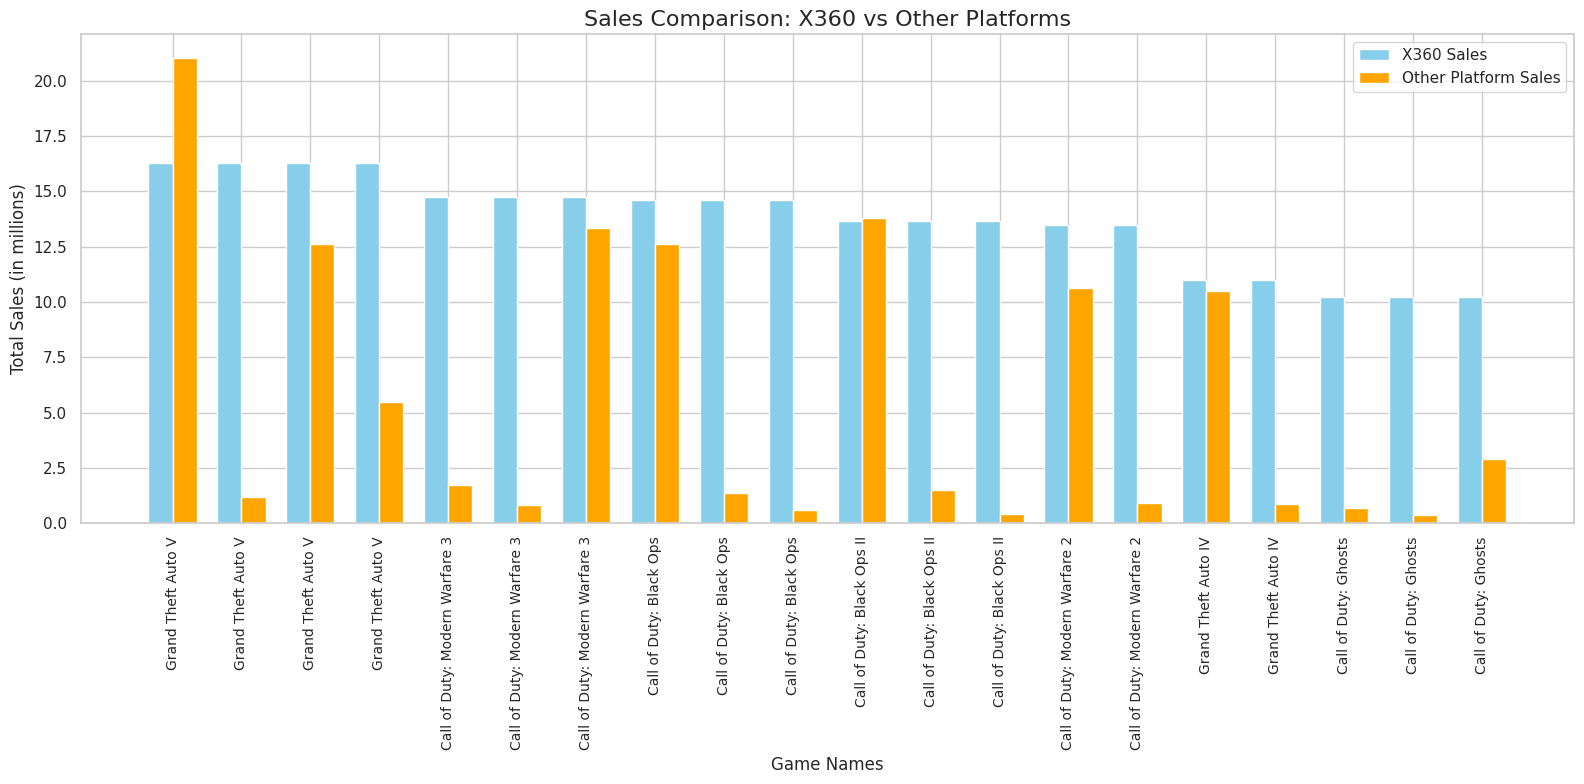

Average Sales on X360: 13.69 million
Average Sales on Other Platforms: 5.67 million


In [40]:
def compare_sales_x360_vs_other_barplot(df):
    # Filter games released on X360
    x360_games = df[df['platform'] == 'X360']
    
    # Get the names of games on X360
    x360_game_names = x360_games['name'].unique()
    
    # Filter the games available on other platforms
    other_platform_games = df[(df['name'].isin(x360_game_names)) & (df['platform'] != 'X360')]
    
    # Merge X360 and other platform data on the game name
    comparison_df = pd.merge(x360_games, other_platform_games, on='name', suffixes=('_x360', '_other'))
    
    # Summarize total sales for X360 vs other platforms
    comparison_df['sales_x360'] = comparison_df['total1_sales_x360']
    comparison_df['sales_other'] = comparison_df['total1_sales_other']
    
    # Sort by X360 sales for better visualization
    comparison_df = comparison_df.sort_values('sales_x360', ascending=False).head(20)
    
    # Create a bar plot for comparison
    plt.figure(figsize=(16, 8))
    bar_width = 0.35
    indices = range(len(comparison_df))
    
    plt.bar(indices, comparison_df['sales_x360'], bar_width, label='X360 Sales', color='skyblue')
    plt.bar([i + bar_width for i in indices], comparison_df['sales_other'], bar_width, label='Other Platform Sales', color='orange')
    
    plt.xlabel('Game Names', fontsize=12)
    plt.ylabel('Total Sales (in millions)', fontsize=12)
    plt.title('Sales Comparison: X360 vs Other Platforms', fontsize=16)
    plt.xticks([i + bar_width / 2 for i in indices], comparison_df['name'], rotation=90, fontsize=10)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Somes statistics
    avg_sales_x360 = comparison_df['sales_x360'].mean()
    avg_sales_other = comparison_df['sales_other'].mean()
    print(f"Average Sales on X360: {avg_sales_x360:.2f} million")
    print(f"Average Sales on Other Platforms: {avg_sales_other:.2f} million")
    return comparison_df

comparison_result = compare_sales_x360_vs_other_barplot(df)

# Observation

**Average Sales on X360 (Xbox 360): The average sales figure is 13.69 million units.**
**Average Sales on Other Platforms: The average sales figure for platforms other than Xbox 360 is 5.67 million units.**
**We limited the plot to the top 20 games for better readability.**
**This indicates a significant difference in average sales, with the Xbox 360 outperforming other platforms by more than double the average sales. It suggests the platform's popularity and market dominance during the period analyzed.**
**Could this imply that the correlation between the critic score and sale on others platform are very weak?**

# Take a look at the general distribution of games by genre. 

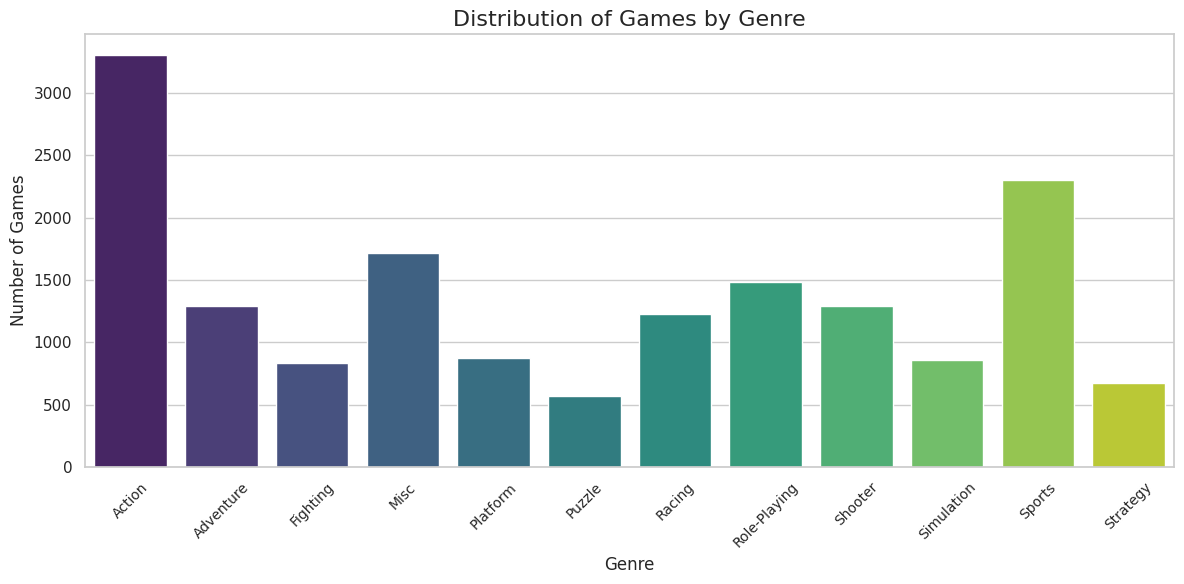

In [41]:
def games_by_genre_distribution(df):
    # Count the number of games for each genre
    genre_counts = df['genre'].value_counts()
    
    # Bar plot for genre distribution
    plt.figure(figsize=(12, 6))
    sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
    plt.title("Distribution of Games by Genre", fontsize=16)
    plt.xlabel("Genre", fontsize=12)
    plt.ylabel("Number of Games", fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()
    plt.show()
games_by_genre_distribution(df)

#  Genre where games consistently bring in high revenue - by considering median sales

           genre  total1_sales
4       Platform          0.27
8        Shooter          0.24
10        Sports          0.22
2       Fighting          0.21
0         Action          0.19
6         Racing          0.19
7   Role-Playing          0.18
3           Misc          0.16
9     Simulation          0.15
5         Puzzle          0.10
11      Strategy          0.10
1      Adventure          0.05


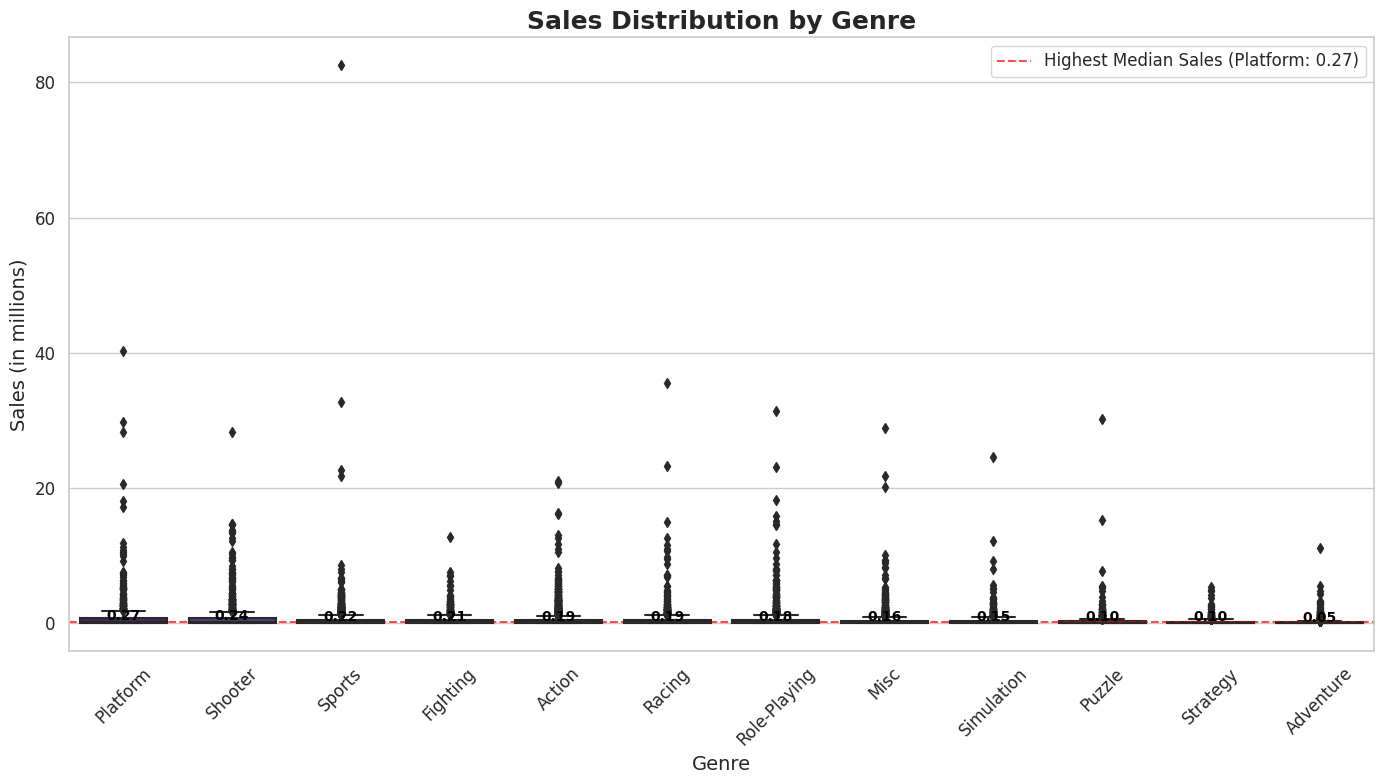

In [42]:
# Set Seaborn style for better visuals
sns.set(style="whitegrid")

# Group the data by genre and calculate the median sales
genre_sales = df.groupby('genre')['total1_sales'].median().reset_index()

# Sort genres by median sales in descending order to identify high-revenue genres
genre_sales_sorted = genre_sales.sort_values(by='total1_sales', ascending=False)

print(genre_sales_sorted)

# Create a boxplot to visualize the sales distribution for each genre
plt.figure(figsize=(14, 8))
boxplot = sns.boxplot(
    x='genre', 
    y='total1_sales', 
    data=df, 
    order=genre_sales_sorted['genre'], 
    palette='viridis'
)

plt.title('Sales Distribution by Genre', fontsize=18, fontweight='bold')
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Sales (in millions)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Rotate genre names for readability
plt.yticks(fontsize=12)

# Annotate the median sales for each genre on the plot
medians = df.groupby('genre')['total1_sales'].median()
for index, genre in enumerate(genre_sales_sorted['genre']):
    median_value = medians[genre]
    plt.text(index, median_value + 0.2, f'{median_value:.2f}', 
             horizontalalignment='center', color='black', fontsize=10, fontweight='bold')

# Highlight the genre with the highest median sales
highest_genre = genre_sales_sorted.iloc[0]['genre']
highest_median = genre_sales_sorted.iloc[0]['total1_sales']
plt.axhline(y=highest_median, color='red', linestyle='--', alpha=0.7, label=f"Highest Median Sales ({highest_genre}: {highest_median:.2f})")

plt.legend(fontsize=12, loc='upper right')

plt.tight_layout()
plt.show()

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
genre where games consistently bring in high revenue considering median sale code and display was added. 

<div class="alert alert-block alert-success">‚úîÔ∏è
    

__Reviewer's comment ‚Ññ2__

brilliant!

## Observation:

**Top Performers:
Platform games have the highest median sales at 0.27 million. This indicates that games in the "Platform" genre tend to perform consistently well in terms of sales.
Shooter games rank second with a median sales value of 0.24 million, closely followed by Sports games at 0.22 million.**

**Mid Performers:
Genres like Fighting (0.21 million), Action (0.19 million), Racing (0.19 million), and Role-Playing (0.18 million) also show relatively high median sales but lag slightly behind the top three.**

**Low Performers:
Genres such as Simulation (0.15 million), Puzzle (0.10 million), Strategy (0.10 million), and Adventure (0.05 million) have the lowest median sales.**

**Adventure Games:
Adventure games have the lowest median sales at 0.05 million, suggesting they are generally less profitable. However, this could also reflect the niche nature of many titles in this genre or fewer high-budget releases.**



#  What can we say about the most profitable genres?

**We wil follow these step-by-step tips to make an opinion about the most profitable genre.**

**Calculate total sales (total1_sales) for each genre.**

**Identify the most profitable genre based on total sales.**

**Compare its total sales with other genres using a bar chart.**

**Asset the correlation between the reviewers and the most profitable genre.**

The most profitable genre is: Action with total sales of 1716.52 million


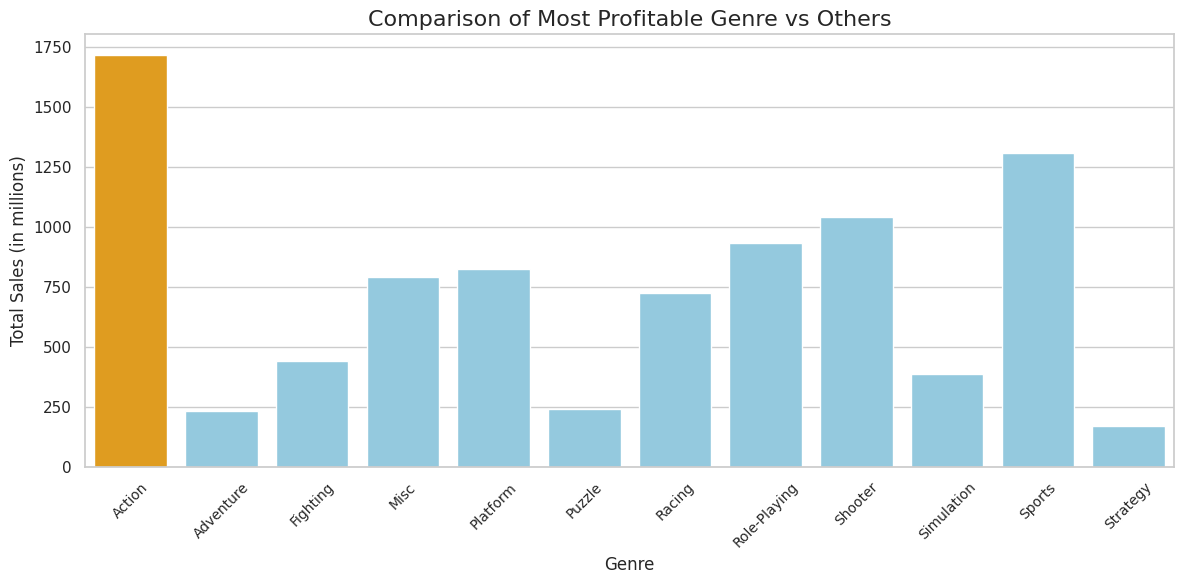

In [43]:
def compare_most_profitable_genre(df):
    # Calculate total sales for each genre
    genre_sales = df.groupby('genre')['total1_sales'].sum().sort_values(ascending=False)
    
    # Identify the most profitable genre
    most_profitable_genre = genre_sales.idxmax()
    most_profitable_sales = genre_sales.max()
    
    print(f"The most profitable genre is: {most_profitable_genre} with total sales of {most_profitable_sales:.2f} million")
    
    # Create a comparison DataFrame
    genre_sales_df = genre_sales.reset_index()
    genre_sales_df['highlight'] = genre_sales_df['genre'] == most_profitable_genre
    
    # Plot comparison
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=genre_sales_df,
        x='genre', y='total1_sales', 
        palette=['orange' if highlight else 'skyblue' for highlight in genre_sales_df['highlight']]
    )
    plt.title("Comparison of Most Profitable Genre vs Others", fontsize=16)
    plt.xlabel("Genre", fontsize=12)
    plt.ylabel("Total Sales (in millions)", fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()
    plt.show()

compare_most_profitable_genre(df)

**This was expected as the Ation genre was the most popular and dominant.**

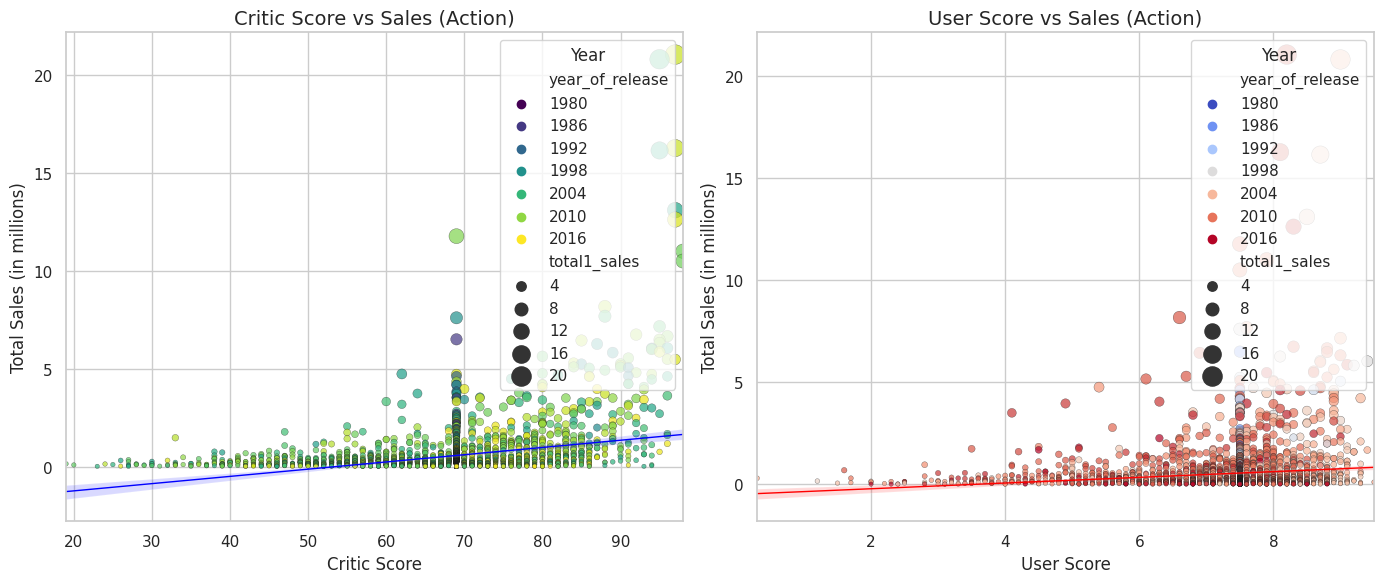

In [44]:
def scatter_plot_reviews_sales_informative(df):
    # Calculate total sales for each genre
    genre_sales = df.groupby('genre')['total1_sales'].sum().sort_values(ascending=False)
    most_profitable_genre = genre_sales.idxmax()
    
    # Filter the data for the most profitable genre
    profitable_genre_df = df[df['genre'] == most_profitable_genre]
    
    plt.figure(figsize=(14, 6))
    # Added a regression line using sns.regplot() to indicate the general direction of the relationship.
    # Critic Score vs Total Sales with trend line
    plt.subplot(1, 2, 1)
    sns.scatterplot(
        data=profitable_genre_df,
        x='critic_score', y='total1_sales', 
        hue='year_of_release', size='total1_sales',
        palette='viridis', sizes=(10, 200), alpha=0.7, edgecolor='k'
    )
    sns.regplot(
        data=profitable_genre_df,
        x='critic_score', y='total1_sales',
        scatter=False, color='blue', line_kws={"linewidth": 1}
    )
    plt.title(f"Critic Score vs Sales ({most_profitable_genre})", fontsize=14)
    plt.xlabel("Critic Score", fontsize=12)
    plt.ylabel("Total Sales (in millions)", fontsize=12)
    plt.legend(title="Year", loc='upper right')
    
    # User Score vs Total Sales with trend line
    plt.subplot(1, 2, 2)
    sns.scatterplot(
        data=profitable_genre_df,
        x='user_score', y='total1_sales',
        hue='year_of_release', size='total1_sales',
        palette='coolwarm', sizes=(10, 200), alpha=0.7, edgecolor='k'
    )
    sns.regplot(
        data=profitable_genre_df,
        x='user_score', y='total1_sales',
        scatter=False, color='red', line_kws={"linewidth": 1}
    )
    plt.title(f"User Score vs Sales ({most_profitable_genre})", fontsize=14)
    plt.xlabel("User Score", fontsize=12)
    plt.ylabel("Total Sales (in millions)", fontsize=12)
    plt.legend(title="Year", loc='upper right')
    
    plt.tight_layout()
    plt.show()

scatter_plot_reviews_sales_informative(df)

In [45]:
def correlation_reviews_profitable_genre(df):
    # Calculate total sales for each genre
    genre_sales = df.groupby('genre')['total1_sales'].sum().sort_values(ascending=False)
    most_profitable_genre = genre_sales.idxmax()
    
    # Filter the data for the most profitable genre
    profitable_genre_df = df[df['genre'] == most_profitable_genre]
    
    # Calculate correlations
    corr_critic, p_critic = pearsonr(profitable_genre_df['critic_score'], profitable_genre_df['total1_sales'])
    corr_user, p_user = pearsonr(profitable_genre_df['user_score'], profitable_genre_df['total1_sales'])
    
    print(f"Most Profitable Genre: {most_profitable_genre}")
    print(f"Correlation between Critic Score and Sales(Action): {corr_critic:.2f} (p-value: {p_critic:.4f})")
    print(f"Correlation between User Score and Sales(Action): {corr_user:.2f} (p-value: {p_user:.4f})")
    
correlation_reviews_profitable_genre(df)

Most Profitable Genre: Action
Correlation between Critic Score and Sales(Action): 0.34 (p-value: 0.0000)
Correlation between User Score and Sales(Action): 0.13 (p-value: 0.0000)


# Observation:

**Critic Score vs Total Sales(Action): The scatter plot with a gradient and a trend line showing how sales increase (or decrease) with critic scores which is slightly noticable here.**

**User Score vs Total Sales(Action):Similar scatter plot, but with user scores and a trend line showing the impact of user reviews who is very small here or almost non significant here.**

**This output on correlation indicates a moderate positive relationship between critic scores and sales, and as critic scores increase, sales tend to increase as well, though the relationship is not strong.**

**Correlation Between User Score and Sales indicates a very weak positive correlation between user scores and sales and the relationship is so weak that it might not have practical importance.**

**As a general statement about others genres with high and low sales i think the reviewers factor will mirror the corelation we noticed on the most popular and most profitable genre(Action).**

<div class="alert alert-block alert-success">‚úîÔ∏è
    

__Reviewer's comment ‚Ññ1__

I agree

# 4.0 Create a user profile for each region

# 4.1 User profile for NA region and the top five platforms. Describe variations in their market shares from region to region.

**To analyze the top five platforms for user profile in the NA (North America) region and describe variations in their market shares across different regions, we can follow a similar process as we did for sales. However, instead of focusing on the na_sales, we will use the user_score as the basis for determining the top platforms by user profile. Here's a step-by-step methodology:**

**Filter for NA Region: We will use the na_sales column to focus on North America, but we will now focus on user_score for ranking platforms.**

**Top Five Platforms by User Score: Identify the top five platforms based on average user_score in the NA region.**

**Compare Market Share Across Regions: For each of the top five platforms, we will compare their market share in the NA region against other regions (EU, JP, Other).**

**Visualize Results: Create a bar plot showing how the top platforms' market share varies across regions.**



Top 5 Platforms by User Score (NA Region):
platform
DC     7.776923
GC     7.576199
PS2    7.571885
GBA    7.552404
PS     7.547899
Name: user_score, dtype: float64


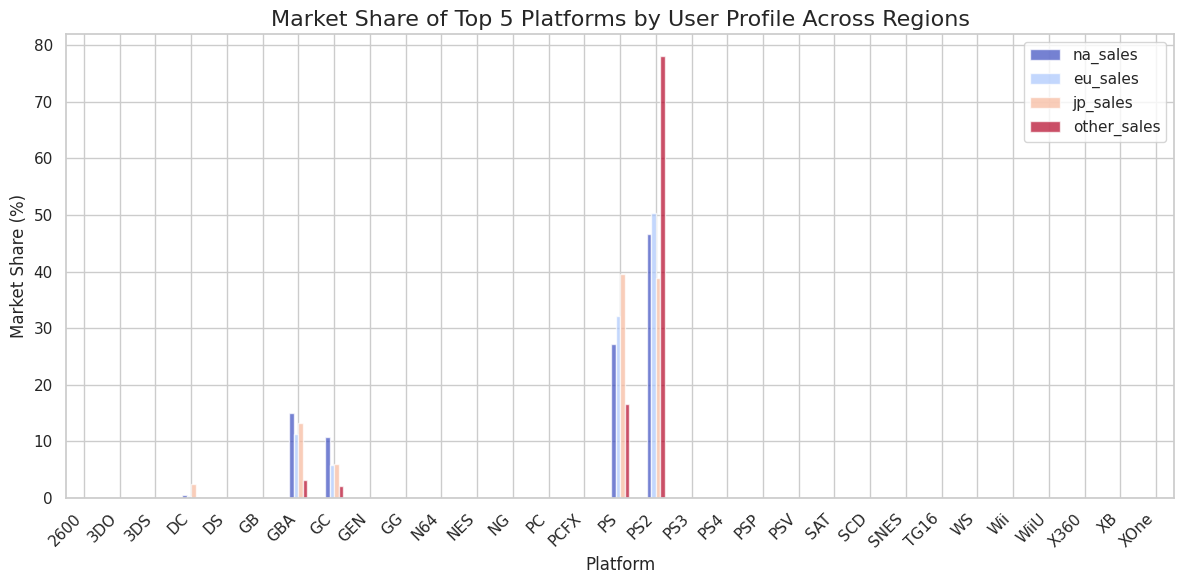

In [46]:
def top_platforms_na_user_profile(df):
    # Filter data for NA region and calculate average user score by platform
    na_user_score_by_platform = df.groupby('platform')['user_score'].mean().sort_values(ascending=False)
    
    # Top 5 platforms by average user score in the NA region
    top_5_platforms_user_score = na_user_score_by_platform.head(5)
    
    print("Top 5 Platforms by User Score (NA Region):")
    print(top_5_platforms_user_score)
    
    # Filter data for the top 5 platforms
    top_5_platforms_user_score_data = df[df['platform'].isin(top_5_platforms_user_score.index)]
    
    # Calculate total sales for each platform by region
    region_sales_by_platform = top_5_platforms_user_score_data.groupby(['platform'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
    
    # Calculate the total sales for each region
    region_totals = region_sales_by_platform.sum(axis=0)
    
    # Calculate the market share of each platform in each region
    market_share = region_sales_by_platform.div(region_totals, axis=1) * 100
    
    #print("\nMarket Share of Top 5 Platforms Across Regions:")
    #print(market_share)
    
    # Plot market share variations across regions
    market_share.plot(kind='bar', figsize=(12, 6), colormap='coolwarm', alpha=0.7)
    plt.title("Market Share of Top 5 Platforms by User Profile Across Regions", fontsize=16)
    plt.xlabel("Platform", fontsize=12)
    plt.ylabel("Market Share (%)", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

top_platforms_na_user_profile(df)

# Observation:

**Reflecting from the above data, we see that the top platform DC market share is almost non existent except in JP regions with a small share display.**

**The GBA platform show a small share in other region and a share just a bit under 20% in NA,EU and JP regions.**

**The GC platform show a small share in other region and a share just a bit close to 10% in NA,EU and JP regions.**

**The PS platform show an increase share in all regions with a dominace in JP with a top share for just arround 40%.**

**The PS2 platform show a bigger increase share in all region as well with the dominace in others region that top just a bit under 80% of the market share.**


# 4.2 The top five genres.

**To determine the top five genres for the NA (North America) region, we will rank genres based on their total sales (na_sales) in the NA region.**

**We will be following these steps:**

**Group Data by Genre: Sum the total na_sales for each genre.**

**Identify Top 5 Genres: Sort genres by total na_sales in descending order and pick the top five.**

**Visualize Results: Create a bar plot to display the top five genres and their sales for the NA region.**

Top 5 Genres in NA Region by Sales:
genre
Action      863.17
Sports      671.20
Shooter     584.83
Platform    444.44
Misc        399.57
Name: na_sales, dtype: float64


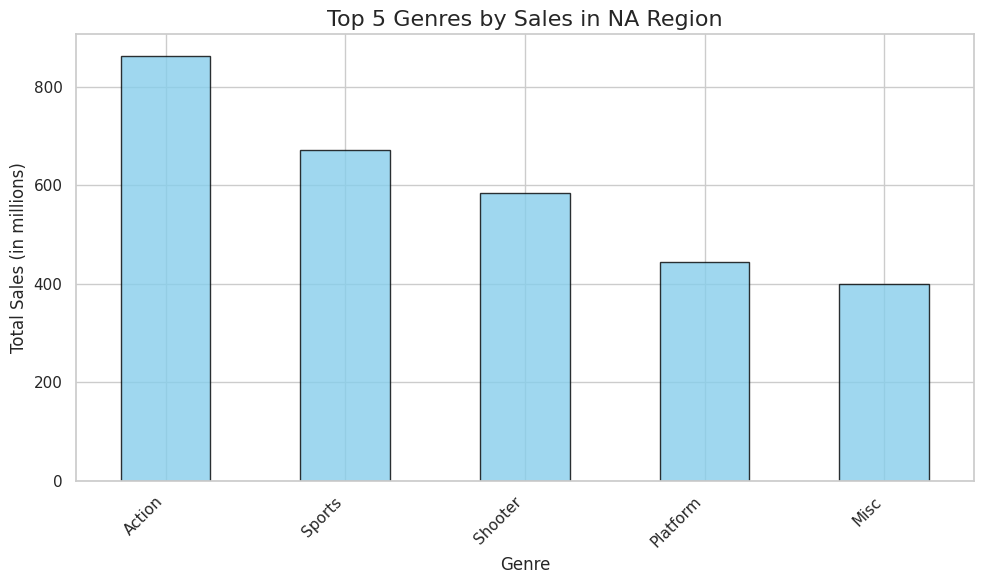

In [47]:
def top_genres_na(df):
    # Sum NA sales by genre
    na_sales_by_genre = df.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
    
    # Top 5 genres in the NA region
    top_5_genres = na_sales_by_genre.head(5)
    
    print("Top 5 Genres in NA Region by Sales:")
    print(top_5_genres)
    

    top_5_genres.plot(kind='bar', figsize=(10, 6), color='skyblue', alpha=0.8, edgecolor='black')
    plt.title("Top 5 Genres by Sales in NA Region", fontsize=16)
    plt.xlabel("Genre", fontsize=12)
    plt.ylabel("Total Sales (in millions)", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

top_genres_na(df)

# Observation:

**As we anticipated Action and Sport genres are still the dominant in town.**

**The differnce between the top five genre can clearly percieved by looking at the sale of each genre in the NA region.**

# 4.3 Do ESRB ratings affect sales in individual regions?(NA)

**To analyze how Rating (ESRB) affects sales in the NA region, we will compare the total na_sales for each rating category and this will help us understand if certain ratings are associated with higher sales in North America.**

**We will follow these step:**

**Group Data by Rating: Aggregate the total na_sales for each rating category.**

**Sort Ratings by Sales: Rank the ratings based on their total sales in descending order.**

**Visualize Results: Use a bar plot to display how sales vary by rating in the NA region.**

Total NA Sales by ESRB Rating:
rating
E          1676.97
T           913.45
M           807.36
Unknown     541.91
E10+        396.38
K-A           2.56
EC            1.53
AO            1.26
RP            0.00
Name: na_sales, dtype: float64


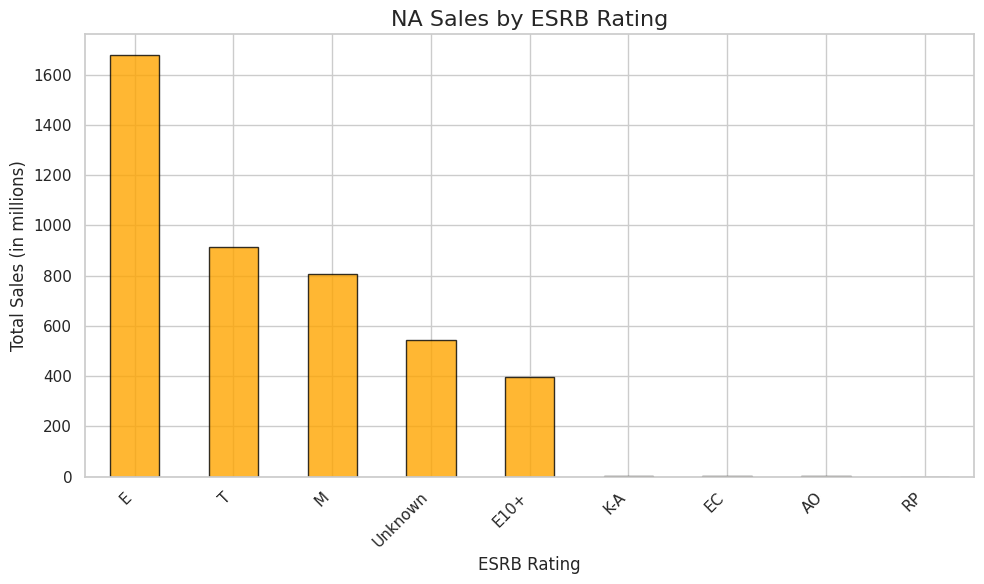

In [48]:
def analyze_rating_sales_na(df):
    # Group NA sales by ESRB rating
    na_sales_by_rating = df.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
    
    print("Total NA Sales by ESRB Rating:")
    print(na_sales_by_rating)
    
    
    na_sales_by_rating.plot(kind='bar', figsize=(10, 6), color='orange', alpha=0.8, edgecolor='black')
    plt.title("NA Sales by ESRB Rating", fontsize=16)
    plt.xlabel("ESRB Rating", fontsize=12)
    plt.ylabel("Total Sales (in millions)", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

analyze_rating_sales_na(df)

**By looking at the plot we can say affirmatively that ESRB ratings affect sales in individual regions fort this case NA region.**

# 4.1.2 User profile for EU region and the top five platforms. Describe variations in their market shares from region to region.

**We will be following the same logic as we did with the NA region.**

Top 5 Platforms by User Score (EU Region):
platform
DC     7.776923
GC     7.576199
PS2    7.571885
GBA    7.552404
PS     7.547899
Name: user_score, dtype: float64


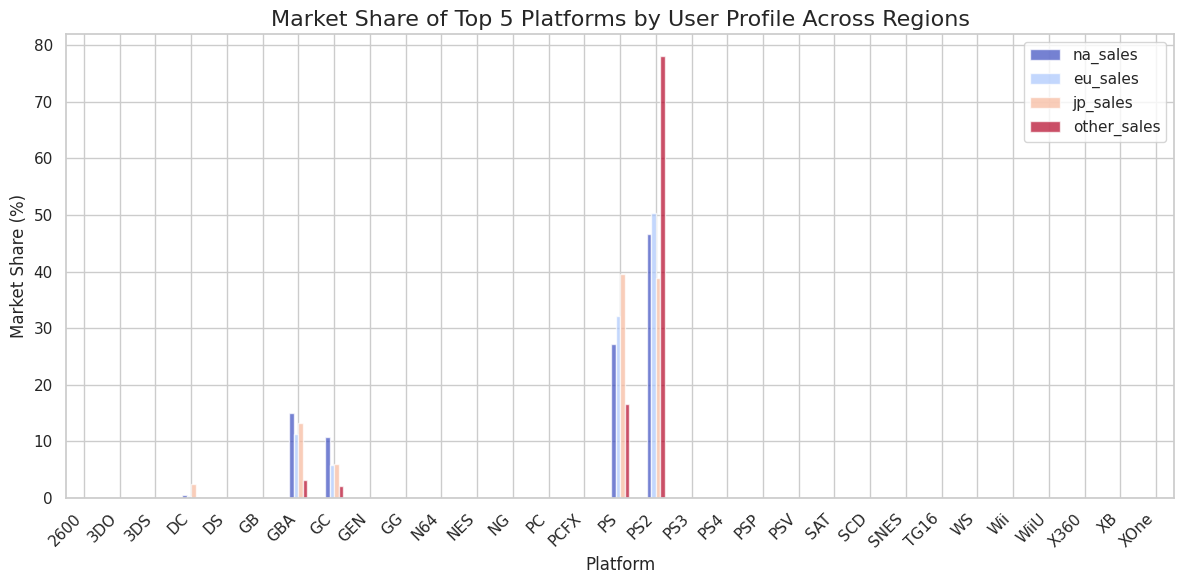

In [49]:
def top_platforms_eu_user_profile(df):
    # Filter data for EU region and calculate average user score by platform
    eu_user_score_by_platform = df.groupby('platform')['user_score'].mean().sort_values(ascending=False)
    
    # Top 5 platforms by average user score in the EU region
    top_5_platforms_user_score = eu_user_score_by_platform.head(5)
    
    print("Top 5 Platforms by User Score (EU Region):")
    print(top_5_platforms_user_score)
    
    # Filter data for the top 5 platforms
    top_5_platforms_user_score_data = df[df['platform'].isin(top_5_platforms_user_score.index)]
    
    # Calculate total sales for each platform by region
    region_sales_by_platform = top_5_platforms_user_score_data.groupby(['platform'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
    
    # Calculate the total sales for each region
    region_totals = region_sales_by_platform.sum(axis=0)
    
    # Calculate the market share of each platform in each region
    market_share = region_sales_by_platform.div(region_totals, axis=1) * 100
    
    #print("\nMarket Share of Top 5 Platforms Across Regions:")
    #print(market_share)
    
    # Plot market share variations across regions
    market_share.plot(kind='bar', figsize=(12, 6), colormap='coolwarm', alpha=0.7)
    plt.title("Market Share of Top 5 Platforms by User Profile Across Regions", fontsize=16)
    plt.xlabel("Platform", fontsize=12)
    plt.ylabel("Market Share (%)", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

top_platforms_eu_user_profile(df)

# Observation:

**Reflecting from the above data, we see that the top platform DC market share is almost non existent except in JP regions with a small share display.**

**The GBA platform show a small share in other region and a share just a bit under 20% in NA,EU and JP regions.**

**The GC platform show a small share in other region and a share just a bit close to 10% in NA,EU and JP regions.**

**The PS platform show an increase share in all regions with a dominace in JP with a top share for just arround 40%.**

**The PS2 platform show a bigger increase share in all region as well with the dominace in others region that top just a bit under 80% of the market share.**

**A striking similarity with the NA region**

# 4.2.2 The top five genres.(EU)

**We will be following the same logic as we did with the NA region.**

Top 5 Genres in EU Region by Sales:
genre
Action     510.99
Sports     371.33
Shooter    314.52
Racing     234.49
Misc       210.60
Name: eu_sales, dtype: float64


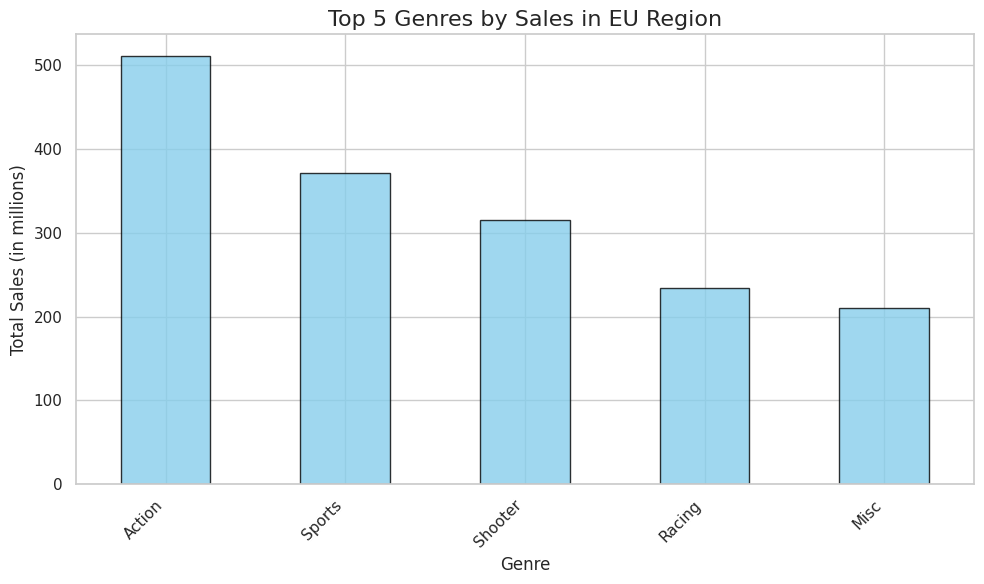

In [50]:
def top_genres_eu(df):
    # Sum EU sales by genre
    eu_sales_by_genre = df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
    
    # Top 5 genres in the EU region
    top_5_genres = eu_sales_by_genre.head(5)
    
    print("Top 5 Genres in EU Region by Sales:")
    print(top_5_genres)
    

    top_5_genres.plot(kind='bar', figsize=(10, 6), color='skyblue', alpha=0.8, edgecolor='black')
    plt.title("Top 5 Genres by Sales in EU Region", fontsize=16)
    plt.xlabel("Genre", fontsize=12)
    plt.ylabel("Total Sales (in millions)", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

top_genres_eu(df)

<div class="alert alert-block alert-success">‚úîÔ∏è
    

__Reviewer's comment ‚Ññ1__

Great chart

# Observation:

**As we anticipated Action and Sport genres are still the dominant in town.**

**The differnce between the top five genre can clearly percieved by looking at the sale of each genre in the EU region.**

# 4.3.3 Do ESRB ratings affect sales in individual regions?(EU)

Total EU Sales by ESRB Rating:
rating
E          970.51
T          541.63
M          533.21
E10+       213.07
Unknown    140.24
AO           0.61
K-A          0.27
EC           0.11
RP           0.03
Name: eu_sales, dtype: float64


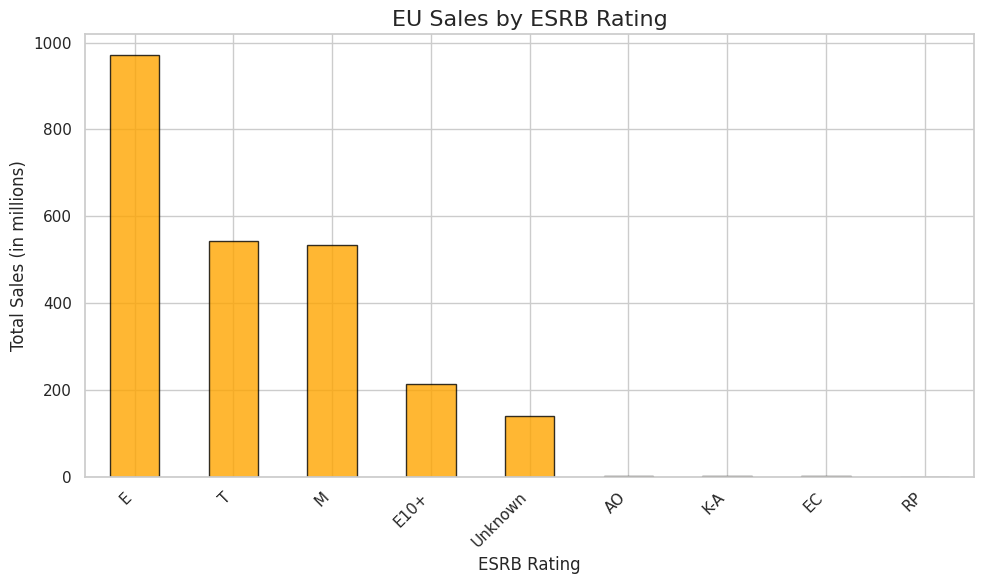

In [51]:
def analyze_rating_sales_eu(df):
    # Group EU sales by ESRB rating
    eu_sales_by_rating = df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
    
    print("Total EU Sales by ESRB Rating:")
    print(eu_sales_by_rating)
    
    
    eu_sales_by_rating.plot(kind='bar', figsize=(10, 6), color='orange', alpha=0.8, edgecolor='black')
    plt.title("EU Sales by ESRB Rating", fontsize=16)
    plt.xlabel("ESRB Rating", fontsize=12)
    plt.ylabel("Total Sales (in millions)", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

analyze_rating_sales_eu(df)

**By looking at the plot we can say affirmatively that ESRB ratings affect sales in individual regions fort this case EU region.**

# 4.1.3 User profile for EU region and the top five platforms. Describe variations in their market shares from region to region.

**We will be following the same logic as we did with the NA region.**

Top 5 Platforms by User Score (JP Region):
platform
DC     7.776923
GC     7.576199
PS2    7.571885
GBA    7.552404
PS     7.547899
Name: user_score, dtype: float64

Market Share of Top 5 Platforms Across Regions:
           na_sales   eu_sales   jp_sales  other_sales
platform                                              
2600       0.000000   0.000000   0.000000     0.000000
3DO        0.000000   0.000000   0.000000     0.000000
3DS        0.000000   0.000000   0.000000     0.000000
DC         0.441776   0.256208   2.419583     0.110579
DS         0.000000   0.000000   0.000000     0.000000
GB         0.000000   0.000000   0.000000     0.000000
GBA       14.979701  11.308026  13.160721     3.116681
GC        10.734422   5.809405   6.031997     2.100995
GEN        0.000000   0.000000   0.000000     0.000000
GG         0.000000   0.000000   0.000000     0.000000
N64        0.000000   0.000000   0.000000     0.000000
NES        0.000000   0.000000   0.000000     0.000000
NG         0.000

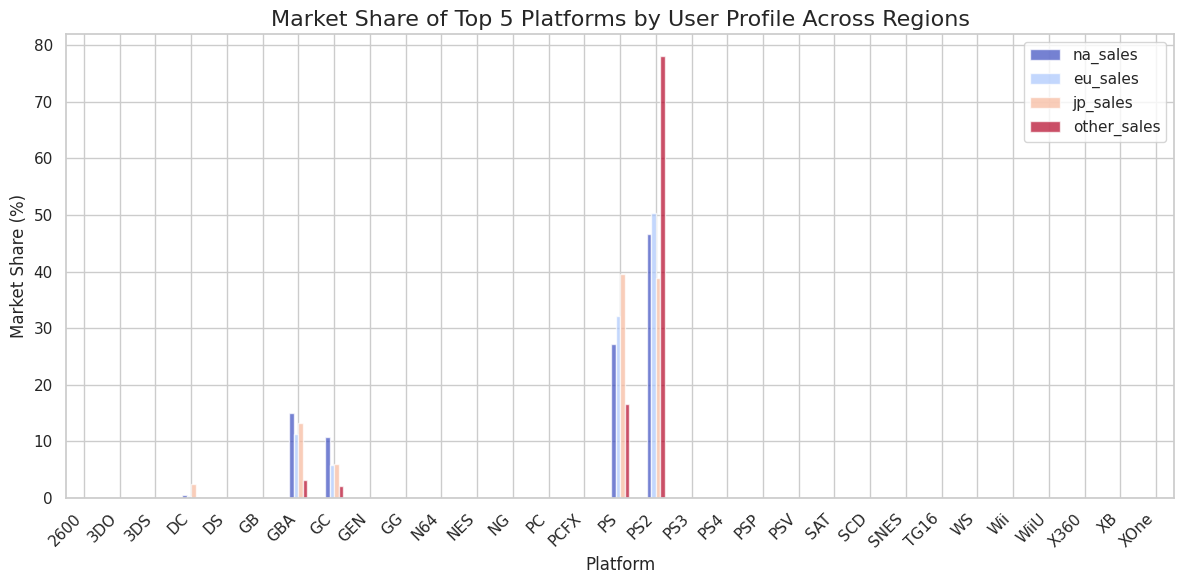

In [52]:
def top_platforms_jp_user_profile(df):
    # Filter data for JP region and calculate average user score by platform
    jp_user_score_by_platform = df.groupby('platform')['user_score'].mean().sort_values(ascending=False)
    
    # Top 5 platforms by average user score in the JP region
    top_5_platforms_user_score = jp_user_score_by_platform.head(5)
    
    print("Top 5 Platforms by User Score (JP Region):")
    print(top_5_platforms_user_score)
    
    # Filter data for the top 5 platforms
    top_5_platforms_user_score_data = df[df['platform'].isin(top_5_platforms_user_score.index)]
    
    # Calculate total sales for each platform by region
    region_sales_by_platform = top_5_platforms_user_score_data.groupby(['platform'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
    
    # Calculate the total sales for each region
    region_totals = region_sales_by_platform.sum(axis=0)
    
    # Calculate the market share of each platform in each region
    market_share = region_sales_by_platform.div(region_totals, axis=1) * 100
    
    print("\nMarket Share of Top 5 Platforms Across Regions:")
    print(market_share)
    
    # Plot market share variations across regions
    market_share.plot(kind='bar', figsize=(12, 6), colormap='coolwarm', alpha=0.7)
    plt.title("Market Share of Top 5 Platforms by User Profile Across Regions", fontsize=16)
    plt.xlabel("Platform", fontsize=12)
    plt.ylabel("Market Share (%)", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

top_platforms_jp_user_profile(df)

# Observation:

**Reflecting from the above data, we see that the top platform DC market share is almost non existent except in JP regions with a small share display.**

**The GBA platform show a small share in other region and a share just a bit under 20% in NA,EU and JP regions.**

**The GC platform show a small share in other region and a share just a bit close to 10% in NA,EU and JP regions.**

**The PS platform show an increase share in all regions with a dominace in JP with a top share for just arround 40%.**

**The PS2 platform show a bigger increase share in all region as well with the dominace in others region that top just a bit under 80% of the market share.**

**A striking similarity with the NA and EU region**

# 4.2.3 The top five genres.(JP)

**We will be following the same logic as we did with the NA region.**

Top 5 Genres in JP Region by Sales:
genre
Role-Playing    353.39
Action          160.14
Sports          134.93
Platform        130.71
Misc            107.02
Name: jp_sales, dtype: float64


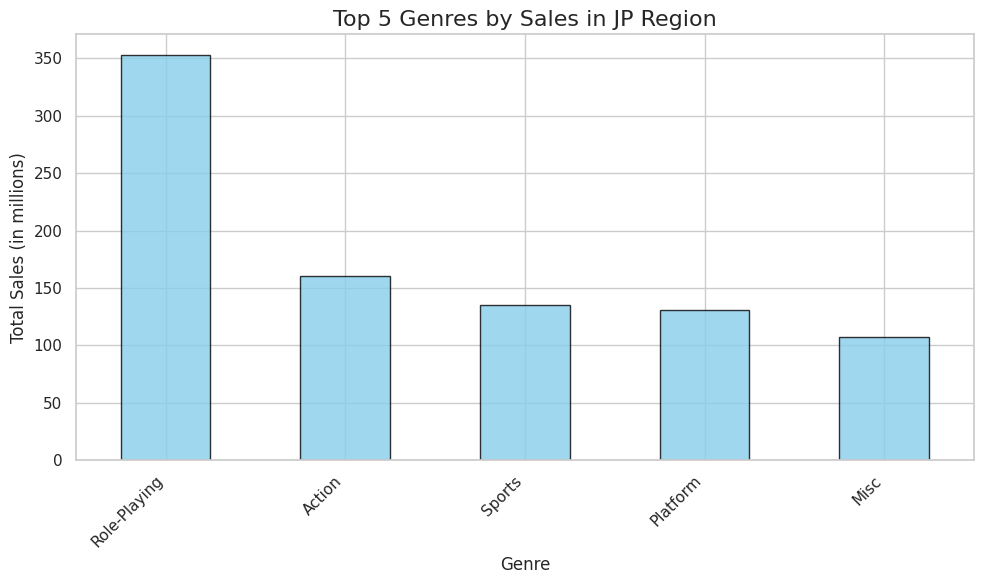

In [53]:
def top_genres_jp(df):
    # Sum JP sales by genre
    jp_sales_by_genre = df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
    
    # Top 5 genres in the JP region
    top_5_genres = jp_sales_by_genre.head(5)
    
    print("Top 5 Genres in JP Region by Sales:")
    print(top_5_genres)
    

    top_5_genres.plot(kind='bar', figsize=(10, 6), color='skyblue', alpha=0.8, edgecolor='black')
    plt.title("Top 5 Genres by Sales in JP Region", fontsize=16)
    plt.xlabel("Genre", fontsize=12)
    plt.ylabel("Total Sales (in millions)", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

top_genres_jp(df)

# Observation:

**we notice here that Action is relegate to the second position following by Sport genres,the dominant in town is now Role-playing with a sale just above 355m.**

**The differnce between the top five genre can clearly percieved by looking at the sale of each genre in the EU region.**

# 4.3.4 Do ESRB ratings affect sales in individual regions?(JP)

Total JP Sales by ESRB Rating:
rating
E          398.91
Unknown    373.31
T          332.88
E10+        98.99
M           85.09
K-A          1.46
AO           0.00
EC           0.00
RP           0.00
Name: jp_sales, dtype: float64


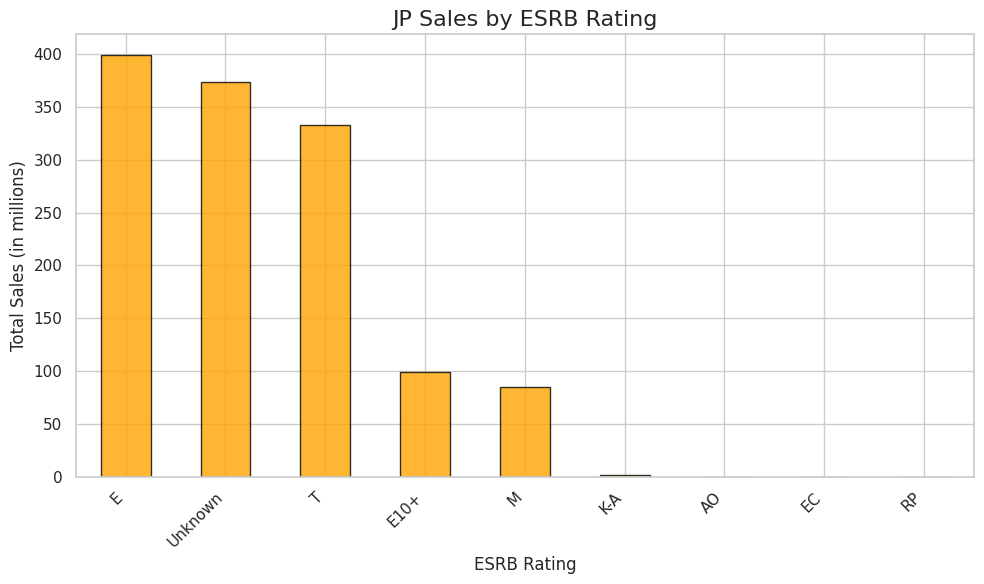

In [54]:
def analyze_rating_sales_jp(df):
    # Group JP sales by ESRB rating
    jp_sales_by_rating = df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
    
    print("Total JP Sales by ESRB Rating:")
    print(jp_sales_by_rating)
    
    
    jp_sales_by_rating.plot(kind='bar', figsize=(10, 6), color='orange', alpha=0.8, edgecolor='black')
    plt.title("JP Sales by ESRB Rating", fontsize=16)
    plt.xlabel("ESRB Rating", fontsize=12)
    plt.ylabel("Total Sales (in millions)", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

analyze_rating_sales_jp(df)

**By looking at the plot we can say affirmatively that ESRB ratings affect sales in individual regions fort this case JP region.**

# 5.0 Test the following hypotheses:

**Average user ratings of the Xbox One and PC platforms are the same.**

**Average user ratings for the Action and Sports genres are different.**

# 5.1 Average user ratings of the Xbox One and PC platforms are the same.

**Null Hypothesis: The average user ratings for Xbox One and PC are the same.**

**Alternative Hypothesis: The average user ratings for Xbox One and PC are different.**



<div class="alert alert-block alert-success">‚úîÔ∏è
    

__Reviewer's comment ‚Ññ1__

Correct interpretation of the Null and Alternative hypotheses

In [55]:
def simple_ttest_xone_pc(df):
    # Filter user scores for Xbox One and PC platforms
    xone_scores = df[df['platform'] == 'XOne']['user_score'].dropna()
    pc_scores = df[df['platform'] == 'PC']['user_score'].dropna()
    
    # two-sample t-test
    ttest = st.ttest_ind(xone_scores, pc_scores)
    print("\nTwo-Sample t-Test Results:")
    print(f"T-statistic: {ttest.statistic:.3f}, p-value: {ttest.pvalue:.3f}")
    
    alpha = 0.05
    if ttest.pvalue < alpha:
        print("Reject the null hypothesis: Average user ratings for Xbox One and PC are different.")
    else:
        print("Fail to reject the null hypothesis: Average user ratings for Xbox One and PC are the same.")

simple_ttest_xone_pc(df)


Two-Sample t-Test Results:
T-statistic: -3.928, p-value: 0.000
Reject the null hypothesis: Average user ratings for Xbox One and PC are different.


**The test result in this case reject the null hypothesis:Average user ratings for Xbox One and PC are different.**

**With a p-value close to 0 suggests strong evidence against the null hypothesis.**

**The results could prompt further investigation into why the ratings differ. Factors like game quality, hardware limitations, user demographics, and platform-specific features (or lack thereof) could be explored.**


# 5.2 Average user ratings for the Action and Sports genres are different.

**Null Hypothesis: The average user ratings for Action and Sports genres are the same.**

**Alternative Hypothesis: The average user ratings for Action and Sports genres are different.**

In [56]:
def ttest_action_vs_sports(df):
    # Filter user scores for Action and Sports genres
    action_scores = df[df['genre'] == 'Action']['user_score'].dropna()
    sports_scores = df[df['genre'] == 'Sports']['user_score'].dropna()
    
    # two-sample t-test
    ttest = st.ttest_ind(action_scores, sports_scores)
    print("\nTwo-Sample t-Test Results:")
    print(f"T-statistic: {ttest.statistic:.3f}, p-value: {ttest.pvalue:.3f}")
    
    alpha = 0.05
    if ttest.pvalue < alpha:
        print("Reject the null hypothesis: Average user ratings for Action and Sports genres are different.")
    else:
        print("Fail to reject the null hypothesis: Average user ratings for Action and Sports genres are the same.")

ttest_action_vs_sports(df)


Two-Sample t-Test Results:
T-statistic: 0.575, p-value: 0.565
Fail to reject the null hypothesis: Average user ratings for Action and Sports genres are the same.


**The test result here fail to reject the null hypothesis: Average user ratings for Action and Sports genres are the same.**
**A high p-value (0.575) indicates that the observed difference (or lack thereof) is highly consistent with the null hypothesis of no difference. There is a 57.5% chance of observing this data (or data closer to no difference) if there truly is no difference in ratings between the two genres.**

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
Conclusion was updated.    

# Conclusion.

**During the course of this project we have expanded on our EDA skill to further analyzed multiple parameters related to the
online store as stated in our intro.**

**Two hypothesis test was conducted toward the end of the project.**

**The first test output the following result:Reject the null hypothesis: Average user ratings for Xbox One and PC are different.This result conclude that there is a statistically significant difference in the average user ratings for Xbox One and PC.As a practical implication for a marketing team we could suggest that if one platform is receiving consistently higher ratings, marketing efforts can focus on leveraging that strength to attract new users or retain current ones. For example, promoting critically acclaimed PC titles in regions where PC gaming is growing and also for the lower-rated platform, targeted campaigns might focus on improving the perception of the platform or addressing specific issues mentioned in user reviews.**

**The second test output the following result:Fail to reject the null hypothesis: Average user ratings for Action and Sports genres are the same.As a practical implication developers and publishers might conclude that focusing solely on genre to predict user satisfaction is not effective. Other factors (game mechanics, visuals, or storytelling) may play a more significant role and marketing strategies can treat both genres as equally appealing in terms of user satisfaction, focusing instead on specific game titles or standout features within each genre.For resources allocation, since the ratings are similar, resources might be distributed equally between Action and Sports genres, rather than prioritizing one genre based on average user satisfaction.**







<div class="alert alert-block alert-success">‚úîÔ∏è
    

__Reviewer's comment ‚Ññ2__


Otherwise it's greatüòä. Your project is begging for github =)   
    
Congratulations on the successful completion of the project üòäüëç
And I wish you success in new works üòä